In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

# Add a 'Country' column for identification
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into one DataFrame for comparison
combined = pd.concat([benin, sierra_leone, togo], ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24428\2081966092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Country', y=metric, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_24428\2081966092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Country', y=metric, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_24428\2081966092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Country', y=metric, palette='viridis')


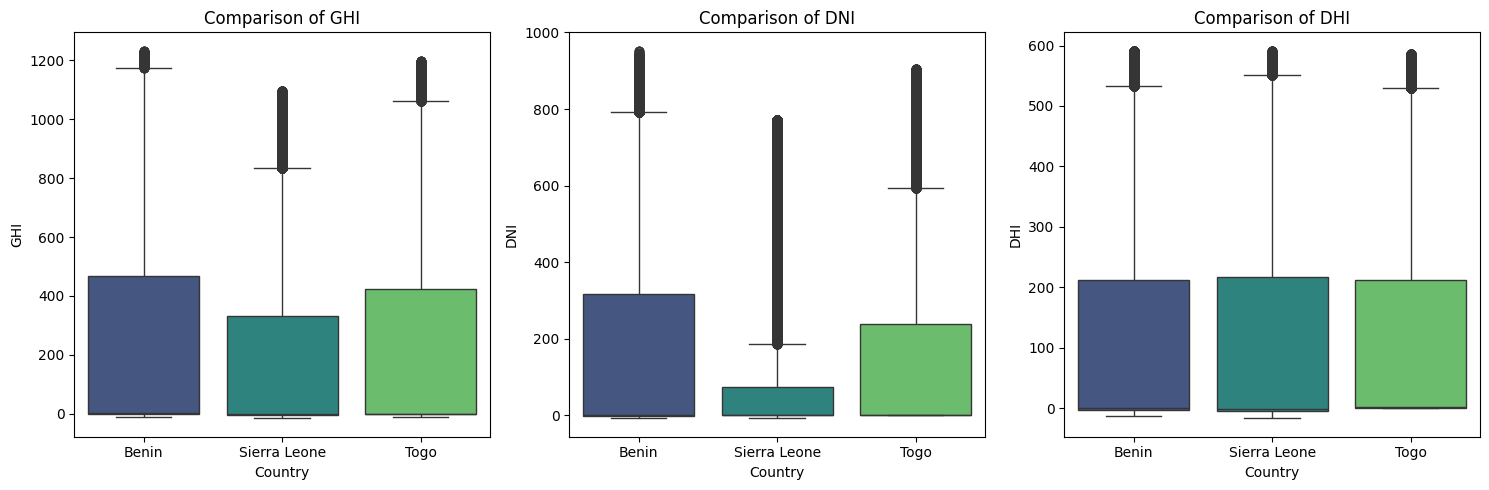

In [2]:
# Plot side-by-side boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=combined, x='Country', y=metric, palette='viridis')
    plt.title(f'Comparison of {metric}')
plt.tight_layout()
plt.show()

In [3]:
# Calculate summary statistics
summary = combined.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
print(summary)

                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744  


In [4]:
from scipy.stats import f_oneway

# Perform ANOVA for GHI
f_stat, p_value = f_oneway(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)
print(f"ANOVA p-value for GHI: {p_value:.4f}")

ANOVA p-value for GHI: 0.0000


1. **GHI (Global Horizontal Irradiance)**  
   - **Benin** has the **highest median GHI** (tallest box), indicating stronger overall solar potential.  
   - **Sierra Leone** shows the **least variability** (shortest box), suggesting more consistent solar radiation.  

2. **DNI (Direct Normal Irradiance)**  
   - **Togo** has the **lowest median DNI** (shortest box), implying weaker direct sunlight for concentrated solar technologies.  
   - **Benin** and **Sierra Leone** exhibit similar DNI distributions, but Benin has more outliers (high potential days).  

3. **DHI (Diffuse Horizontal Irradiance)**  
   - **Sierra Leone** has the **highest median DHI**, likely due to frequent cloud cover (diffuse light dominates).  
   - **Benin** shows the **widest spread** in DHI, indicating fluctuating weather conditions (e.g., clear vs. cloudy days).  

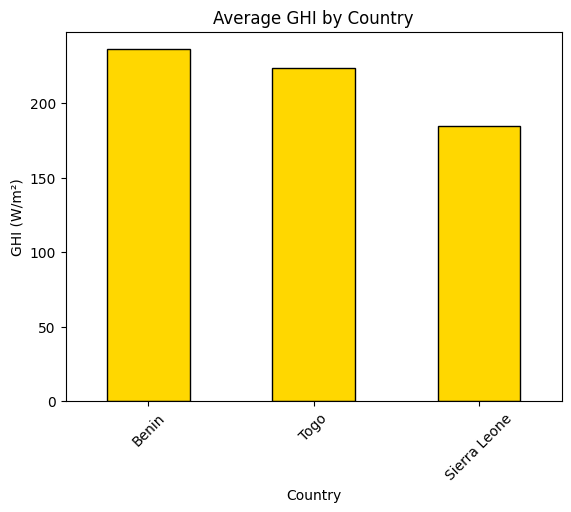

In [5]:
# Rank countries by average GHI
avg_ghi = combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.show()